In [3]:
import pickle

def load_pickle(file_path):
    with open(file_path, 'rb') as handle:
        object = pickle.load(handle)
    return object

- block 0
  - 0th dict {"test": ..., "summary": ...}
    - len("test")
    - len("summary")
    - len("summary") / len("test") 

In [6]:
df = load_pickle('./pickles/tosdr_stats_df.pickle')

In [7]:
df

,block_num,idx_in_block,text_length,summary_length,ratio
0,0,0,331,4,0.012085
1,0,1,31,5,0.161290
2,0,2,327,19,0.058104
3,0,3,343,72,0.209913
4,0,4,146,19,0.130137
...,...,...,...,...,...
1938,9,170,352,15,0.042614
1939,9,171,43,12,0.279070
1940,9,172,54,10,0.185185
1941,9,173,337,2,0.005935


array([[<AxesSubplot:title={'center':'text_length'}>]], dtype=object)

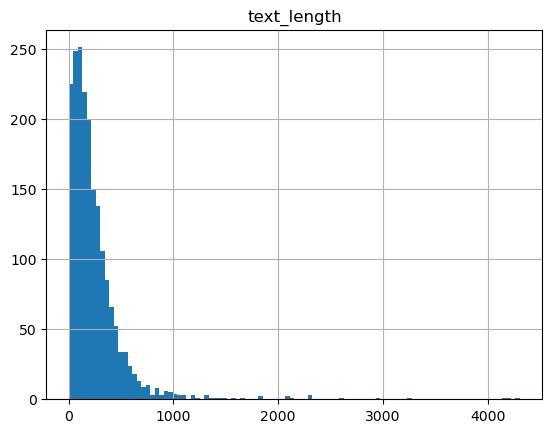

In [9]:
df.hist(column='text_length', bins=100)

array([[<AxesSubplot:title={'center':'summary_length'}>]], dtype=object)

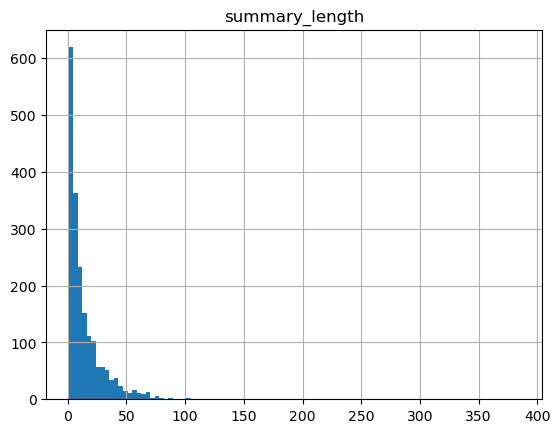

In [10]:
df.hist(column='summary_length', bins=100)

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

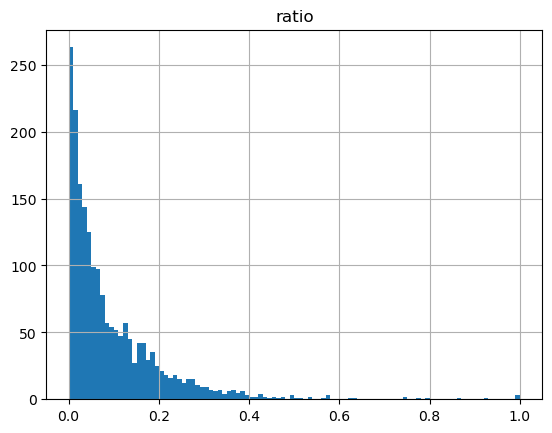

In [11]:
df.hist(column='ratio', bins=100)

<AxesSubplot:>

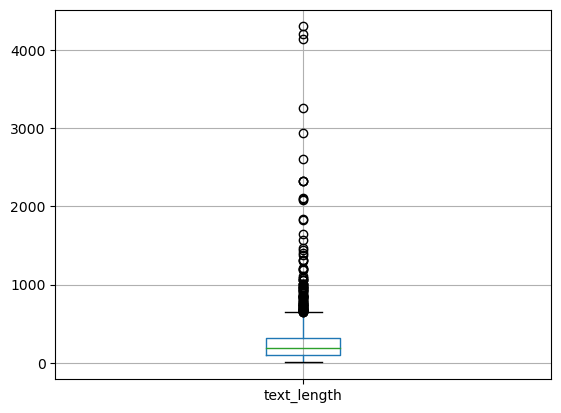

In [18]:
df.boxplot(column='text_length')

<AxesSubplot:>

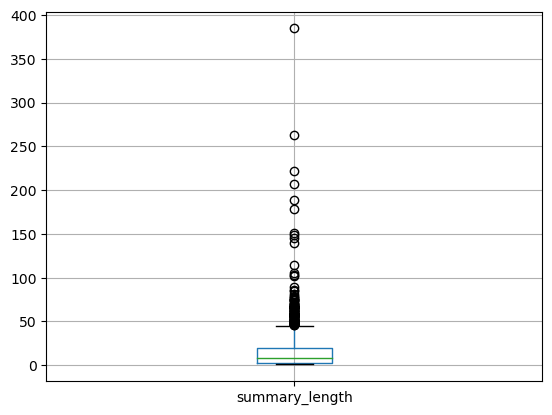

In [19]:
df.boxplot(column='summary_length')

<AxesSubplot:>

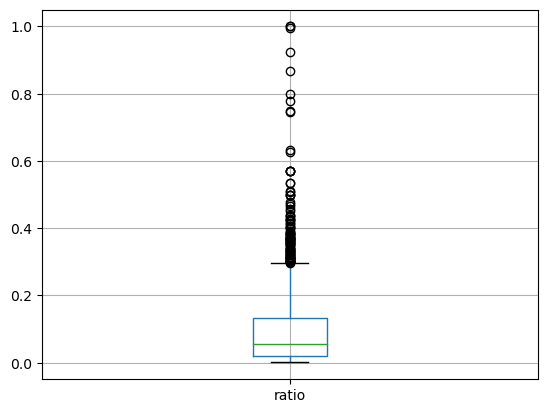

In [20]:
df.boxplot(column='ratio')

In [23]:
print(7/88)
print(10/206)
print(7/13)
print(18/307)
print(4/35)

0.07954545454545454
0.04854368932038835
0.5384615384615384
0.05863192182410423
0.11428571428571428


In [24]:
df.describe()

,idx_in_block,text_length,summary_length,ratio
count,1943.000000,1943.000000,1943.000000,1943.000000
mean,81.141534,250.698405,15.151312,0.095306
std,47.895140,304.306283,21.306690,0.111289
min,0.000000,3.000000,1.000000,0.000770
25%,40.000000,91.000000,3.000000,0.021214
50%,80.000000,183.000000,8.000000,0.056604
75%,121.000000,314.500000,20.000000,0.131681
max,187.000000,4307.000000,385.000000,1.000000


In [36]:
df.max(axis=1)

/var/folders/9y/zqstk1sj3_s_c6600qq7_21w0000gn/T/ipykernel_18052/1471452883.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max(axis=1)


0       331.0
1        31.0
2       327.0
3       343.0
4       146.0
        ...  
1938    352.0
1939    171.0
1940    172.0
1941    337.0
1942    174.0
Length: 1943, dtype: float64

In [39]:
df.loc[df['text_length'] == df['text_length'].max()]

,block_num,idx_in_block,text_length,summary_length,ratio
429,10,91,4307,25,0.005805


In [40]:
df.loc[df['text_length'] == df['text_length'].min()]

,block_num,idx_in_block,text_length,summary_length,ratio
716,2,96,3,1,0.333333


In [41]:
df.loc[df['summary_length'] == df['summary_length'].max()]

,block_num,idx_in_block,text_length,summary_length,ratio
793,3,4,416,385,0.925481


In [42]:
df.loc[df['summary_length'] == df['summary_length'].min()]

,block_num,idx_in_block,text_length,summary_length,ratio
13,0,13,435,1,0.002299
14,0,14,122,1,0.008197
76,0,76,78,1,0.012821
93,0,93,30,1,0.033333
95,0,95,335,1,0.002985
...,...,...,...,...,...
1921,9,153,49,1,0.020408
1924,9,156,25,1,0.040000
1925,9,157,92,1,0.010870
1926,9,158,159,1,0.006289


In [43]:
df.loc[df['ratio'] == df['ratio'].max()]

,block_num,idx_in_block,text_length,summary_length,ratio
225,1,45,15,15,1.0
1657,8,55,5,5,1.0


In [44]:
df.loc[df['ratio'] == df['ratio'].min()]

,block_num,idx_in_block,text_length,summary_length,ratio
1929,9,161,1299,1,0.00077


In [8]:
df.loc[df['ratio'] >= 0.7]

,block_num,idx_in_block,text_length,summary_length,ratio
26,0,26,208,207,0.995192
225,1,45,15,15,1.000000
287,1,107,243,189,0.777778
350,10,12,4,3,0.750000
792,3,3,303,263,0.867987
793,3,4,416,385,0.925481
1035,4,93,47,35,0.744681
1657,8,55,5,5,1.000000
1886,9,118,15,12,0.800000


In [9]:
df_shuffled = df.copy()

In [27]:
df_shuffled.sample(frac=1, random_state=77)

,block_num,idx_in_block,text_length,summary_length,ratio
1368,6,119,299,26,0.086957
816,3,27,99,1,0.010101
1432,7,18,18,5,0.277778
400,10,62,48,1,0.020833
552,11,61,71,1,0.014085
...,...,...,...,...,...
1317,6,68,398,3,0.007538
235,1,55,173,8,0.046243
1620,8,18,165,41,0.248485
607,11,116,190,3,0.015789


In [28]:
n = len(df_shuffled)
train_size = int(n * 0.8)
val_size = (n - train_size) // 2 + 1
test_size = n - train_size - val_size
print(train_size, val_size, test_size)

1554 195 194


In [29]:
train_rows = df_shuffled["ratio"].iloc[:train_size]
val_rows = df_shuffled["ratio"].iloc[train_size:train_size + val_size]
test_rows = df_shuffled["ratio"].iloc[train_size + val_size:]

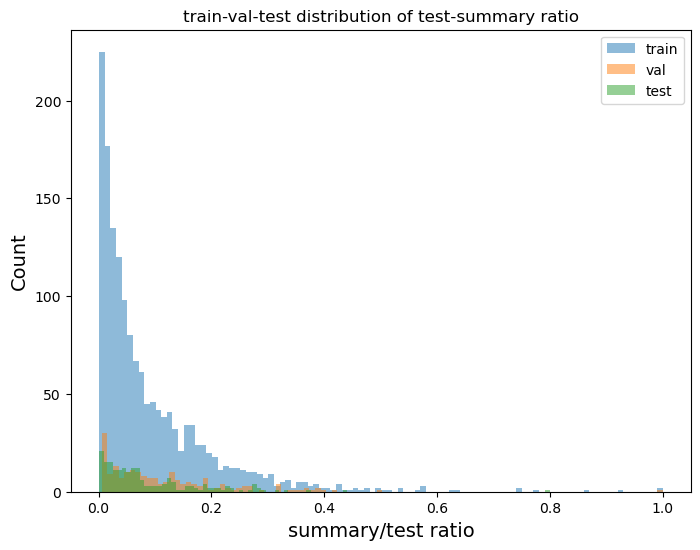

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.hist(train_rows, bins=100, alpha=0.5, label="train")
plt.hist(val_rows, bins=100, alpha=0.5, label="val")
plt.hist(test_rows, bins=100, alpha=0.5, label="test")
plt.xlabel("summary/test ratio", size=14)
plt.ylabel("Count", size=14)
plt.title("train-val-test distribution of test-summary ratio")
plt.legend(loc='upper right')